In [9]:
import pandas as pd
import os

files = os.listdir('../Data/rmsds')
first = True
data = pd.read_csv("../Data/rmsds/5HT2B_rmsds.csv")

for file in files:
    if file[-4:] == '.csv' and file != '5HT2B_rmsds.csv':
        fileData = pd.read_csv("../Data/rmsds/" + file)
        data = pd.concat([data, fileData], sort=False)
data.head()

,protein,start ligand,target ligand,name,num,bfactor,normalized bfactor,prev prev bfactor,prev bfactor,next bfactor,...,mol weight,solvent accessibility,secondary structure,ligand similarity,ligand similarity ratio,ligand size difference,ligand size ratio,rmsd,normal variate bfactor,res name
0,5HT2B,4IB4,5TVN,TRP,131,52.945714,-0.932384,-0.750709,-0.548052,-0.953941,...,186.21515,19.665082,1,20,0.465116,19,1.791667,0.368520,NaN,NaN
1,5HT2B,4IB4,5TVN,LEU,132,52.298750,-0.953941,-0.932384,-0.750709,-0.851453,...,113.16067,0.689631,1,20,0.465116,19,1.791667,0.330603,NaN,NaN
2,5HT2B,4IB4,5TVN,ASP,135,52.543750,-0.945777,-0.943528,-0.851453,-1.085850,...,114.08138,0.443392,1,20,0.465116,19,1.791667,0.856963,NaN,NaN
3,5HT2B,4IB4,5TVN,VAL,136,48.340000,-1.085850,-0.945777,-0.943528,-1.076603,...,99.13358,0.119069,1,20,0.465116,19,1.791667,0.155572,NaN,NaN
4,5HT2B,4IB4,5TVN,SER,139,46.298333,-1.153880,-1.007546,-1.076603,-1.276112,...,87.07880,0.050330,1,20,0.465116,19,1.791667,0.190161,NaN,NaN


In [17]:
data[(data['protein'] == 'MAPK14') & (data['start ligand'] == '1KV1') & (data['target ligand'] == '1YQJ')].drop(['bfactor', 'normalized bfactor', 'prev prev bfactor', 'prev bfactor', 'next bfactor', 'next next bfactor', 'mol weight', 'solvent accessibility', 'secondary structure', 'ligand similarity', 'ligand similarity ratio', 'ligand size difference', 'ligand size ratio', 'normal variate bfactor', 'res name'], axis=1)




,protein,start ligand,target ligand,name,num,rmsd
0,MAPK14,1KV1,1YQJ,ALA,34,9.180652
1,MAPK14,1KV1,1YQJ,TYR,35,12.804216
2,MAPK14,1KV1,1YQJ,VAL,38,1.194000
3,MAPK14,1KV1,1YQJ,ALA,51,0.653511
4,MAPK14,1KV1,1YQJ,VAL,52,0.494868
5,MAPK14,1KV1,1YQJ,LYS,53,1.518806
6,MAPK14,1KV1,1YQJ,GLU,71,1.364754
7,MAPK14,1KV1,1YQJ,LEU,74,1.631913
8,MAPK14,1KV1,1YQJ,LEU,75,0.796501
9,MAPK14,1KV1,1YQJ,MET,78,1.286425


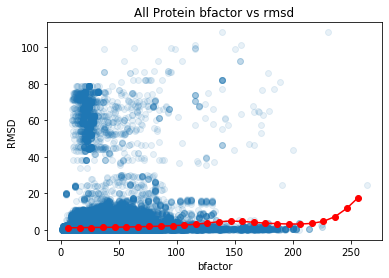

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['bfactor'], data['rmsd'], alpha=0.1)
x_avg, y_avg = weighted_moving_average(data['bfactor'], data['rmsd'], step_size=10, width=20)
plt.plot(x_avg, y_avg, 'o-', color='r')    
plt.title('All Protein bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

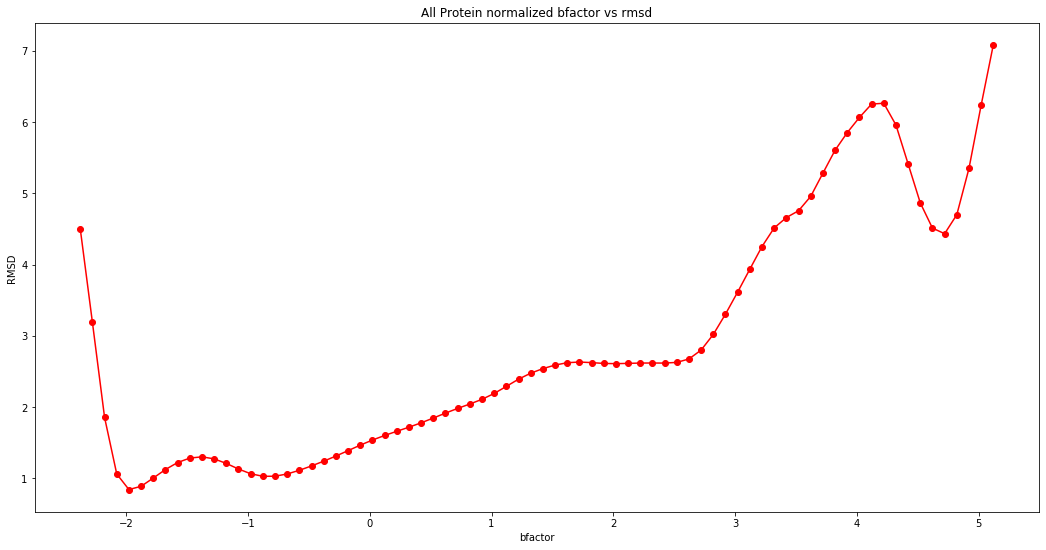

In [5]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

#plt.scatter(data['normalized bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normalized bfactor'], data['rmsd'], step_size=0.1, width=0.2)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('All Protein normalized bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

ValueError: arange: cannot compute length

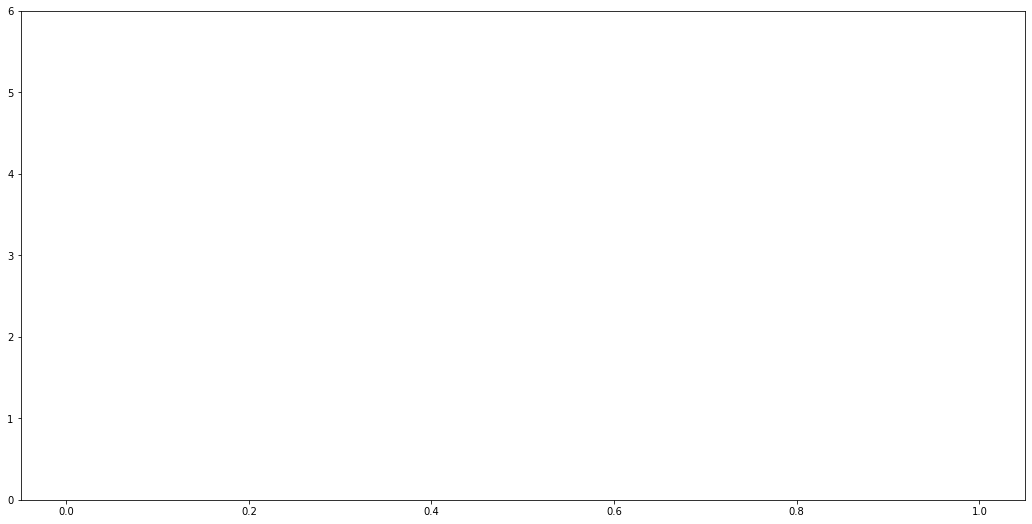

In [6]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['normal variate bfactor'][0::5], data['rmsd'][0::5], alpha=0.1)
plt.ylim((0, 6))
x_avg_norm, y_avg_norm = weighted_moving_average(data['normal variate bfactor'], data['rmsd'], step_size=0.3, width=0.75)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('Normal Variate Bfactor vs Residue RMSD for All Proteins')
plt.xlabel('normal variate bfactor')
plt.ylabel('Flexibility RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

In [6]:
flex_res_dict = {}

for i, rmsd in enumerate(data['rmsd']):
    if data.iloc[i]['protein'] not in flex_res_dict:
        flex_res_dict[data.iloc[i]['protein']] = {}
    if data.iloc[i]['start ligand'] not in flex_res_dict[data.iloc[i]['protein']]:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']] = {}
    if data.iloc[i]['target ligand'] not in flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']]:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] = 0
    if data.iloc[i]['rmsd'] > 2:
        flex_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] += 1
    

In [7]:
import statistics
avg_by_protein = []
for protein in sorted(flex_res_dict.keys()):
    flex_res = []
    for start_ligand in flex_res_dict[protein]:
        flex_res += list(flex_res_dict[protein][start_ligand].values())
    avg_by_protein.append([protein, statistics.mean(flex_res)])

flex_res = pd.DataFrame(avg_by_protein)
flex_res.columns = ['protein', 'avg num flex res']

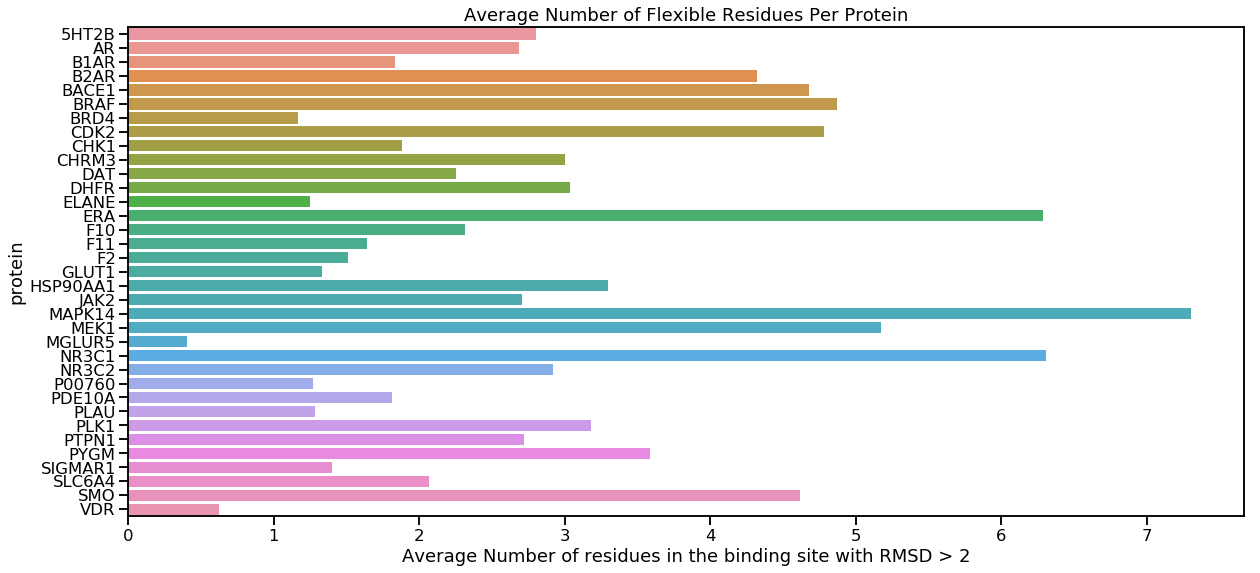

In [13]:
import seaborn as sns

sns.set_context("talk", font_scale=1.0)
#sns.set(style="whitegrid")
ax = sns.barplot(flex_res['avg num flex res'], flex_res['protein'])
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Average Number of Flexible Residues Per Protein')
plt.xlabel('Average Number of residues in the binding site with RMSD > 2')
plt.show()

In [13]:
print("Average of average number of flexibile residues across all proteins:", statistics.mean(flex_res['avg num flex res']))

counter = 0

for rmsd in enumerate(data['rmsd']):
    if rmsd[1] > 2:
        counter += 1
        
print("Percentage of all residues that are flexibile:", counter * 100 / len(data['rmsd']))

Average number of flexibile residues across all proteins: 2.923117253020283
Percentage of all residues that are flexibile: 13.822038836267057


In [14]:
num_res_dict = {}

for i, rmsd in enumerate(data['rmsd']):
    if data.iloc[i]['protein'] not in num_res_dict:
        num_res_dict[data.iloc[i]['protein']] = {}
    if data.iloc[i]['start ligand'] not in num_res_dict[data.iloc[i]['protein']]:
        num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']] = {}
    if data.iloc[i]['target ligand'] not in num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']]:
        num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] = 0
    num_res_dict[data.iloc[i]['protein']][data.iloc[i]['start ligand']][data.iloc[i]['target ligand']] += 1

In [15]:
avg_num_res_by_protein = []
for protein in sorted(flex_res_dict.keys()):
    num_res = []
    for start_ligand in num_res_dict[protein]:
        num_res += list(num_res_dict[protein][start_ligand].values())
    avg_num_res_by_protein.append([protein, statistics.mean(num_res)])

num_res = pd.DataFrame(avg_num_res_by_protein)
num_res.columns = ['protein', 'avg num res']


In [1]:
sns.set_context("talk", font_scale=1.0)
#sns.set(style="whitegrid")
ax = sns.barplot(num_res['avg num res'], num_res['protein'])
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title('Average Number of Residues')
plt.show()


NameError: name 'sns' is not defined

In [21]:
print("Average of average number of residues across all proteins:", statistics.mean(num_res['avg num res']))


Average of average number of residues across all proteins: 23.41475739549664
